## Скачайте материалы к занятию. Проанализируйте ряды, сделайте их стационарными.

In [228]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from scipy.stats import boxcox
%matplotlib inline

In [268]:
sales = pd.read_csv('Series/monthly-sales-of-company-x-jan-6.csv', index_col='Month', parse_dates=True)
boston = pd.read_csv('Series/monthly-boston-armed-robberies-j.csv', index_col = 'Month', parse_dates = True)
passengers = pd.read_csv('Series/international-airline-passengers.csv', index_col = 'Month', parse_dates = True)
temp = pd.read_csv('Series/mean-monthly-air-temperature-deg.csv', index_col = 'Month', parse_dates = True)
dowjones = pd.read_csv('Series/weekly-closings-of-the-dowjones-.csv', index_col = 'Week', parse_dates = True)
births = pd.read_csv('Series/daily-total-female-births-in-cal.csv', index_col = 'Date', parse_dates = True)

In [374]:
# вывод значения p_value, графиков ряда и графиков автокорелляции и частичной автокорелляции
def plot_ts(series):
    adf_test = adfuller(series)
    print('p-value = ' +str(adf_test[1]))
    plt.plot(series)
    plt.show()
    plot_acf(series)
    plt.show()
    plot_pacf(series)
    plt.show()

In [376]:
# определение оптимального значения лага, при котором минимален p_value для сезонного дифференцирования
def minimisation(series, cycle):
    pv = 1
    for i in range(1, cycle):
        series_ = series[i:] -series[:-i]
        adf_test = adfuller(series_)
        #print('p_value:'+str(adf_test[1]))
        if adf_test[1] < pv:
            pv = adf_test[1]
            li = i
        else:
            pass
    
    return li, pv

In [375]:
# дифференцирование
def diff(series, lag):
    series_n = series[lag:] - series[:-lag]
    return series_n

### sales

p-value = 0.9888894205170052


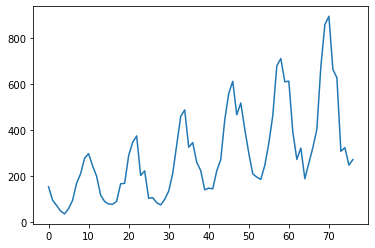

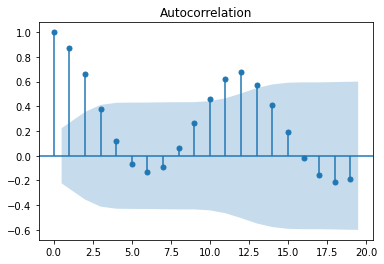

C:\Users\35846\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


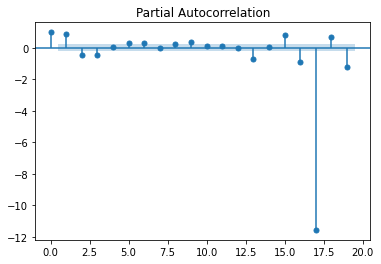

In [260]:
plot_ts(sales['Count'])

Значение p_value = 0,98, что не отвергает гипотезу о нестационарности ряда

Нужно убрать дисперсию преобразованием Бокса-Кокса

In [263]:
sales_b = boxcox(sales['Count'], 0)

p-value = 0.7853102124849118


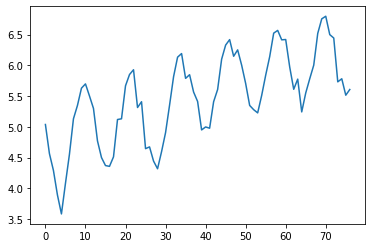

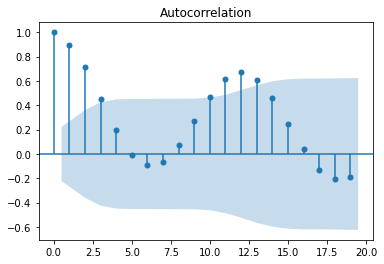

C:\Users\35846\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


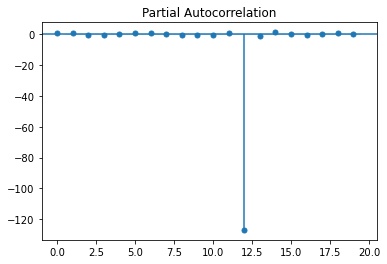

In [264]:
plot_ts(sales_b)

p_value все равно больше 0,05 (0,78). На графиках заметен тренд и сезонность

Тренд убирается дифференцированием

In [297]:
sales_d = diff(sales_b, 1)

p-value = 0.02402539283987578


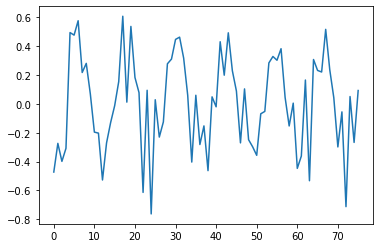

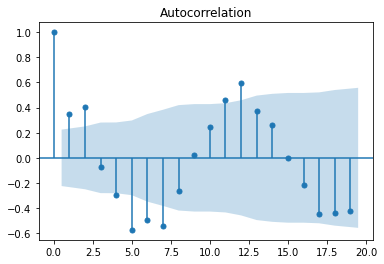

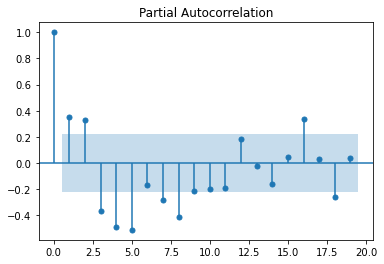

In [298]:
plot_ts(sales_d)

p_value равен 0,024, что ниже 0,05, что подтверждает гипотезу о стационарности. Но на кореллограмме прослеживается сезонность. Можно попробовать сделать сезонную дифференциацию

In [299]:
minimisation(sales_d, 20)

(6, 1.0004022655170604e-18)

функция minimisation выбирает наиболее низкое значение p_value и соответствующую ему сезонность. В данном случае 1*10(-18) при сезонности 6

In [300]:
sales_ds = diff(sales_d, 6)

p-value = 1.0004022655170604e-18


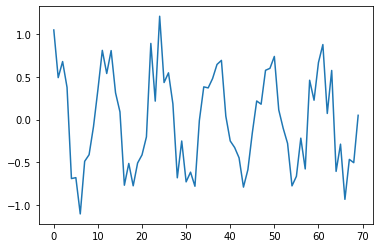

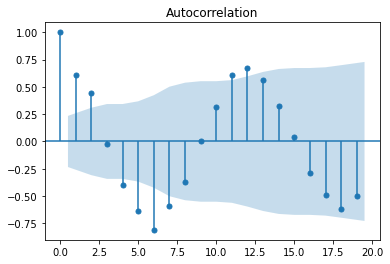

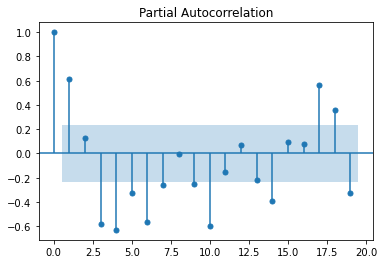

In [301]:
plot_ts(sales_ds)

p_value равен 1*10(-18), что ниже 0,05, что подтверждает гипотезу о стационарности. Но на кореллограмме до сих пор видна сезонность

### boston


p-value = 0.994277563805723


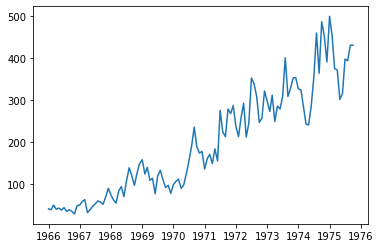

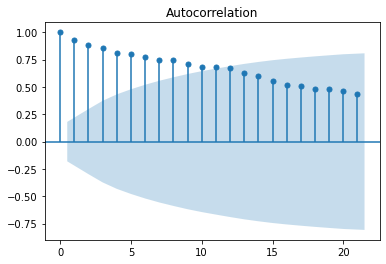

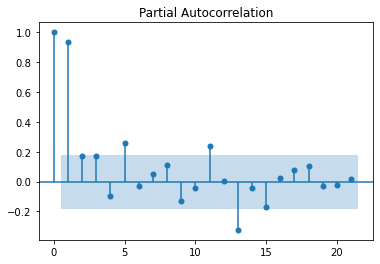

In [306]:
plot_ts(boston['Count'])

Ряд нестационарный. Имеет тренд

In [307]:
boston_b = boxcox(boston['Count'], 0)

p-value = 0.2808325035425533


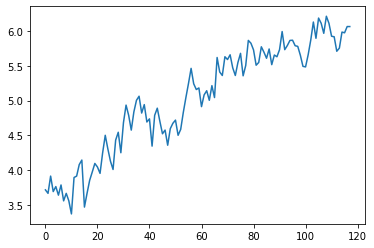

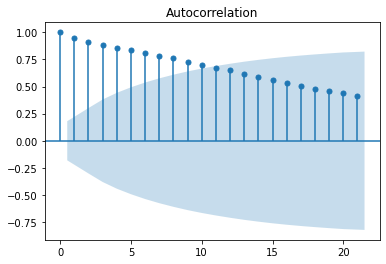

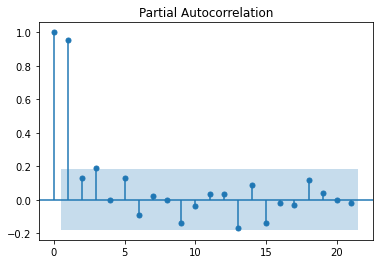

In [308]:
plot_ts(boston_b)

После исключения дисперсии p_value стал равен 0,28. Все так же заметен тренд

In [310]:
boston_d = diff(boston_b, 1)

p-value = 2.3786024417438203e-11


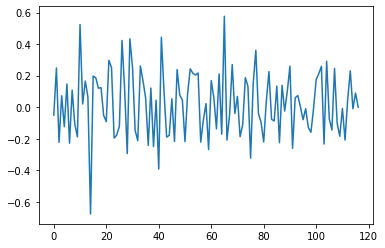

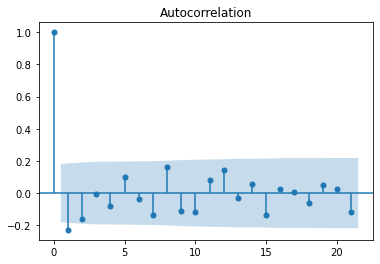

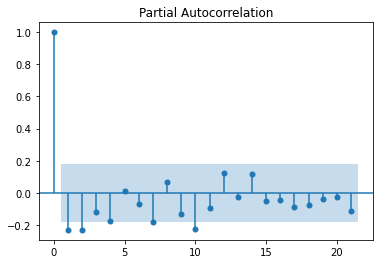

In [311]:
plot_ts(boston_d)

Ряд стационарен

### Passengers

p-value = 0.991880243437641


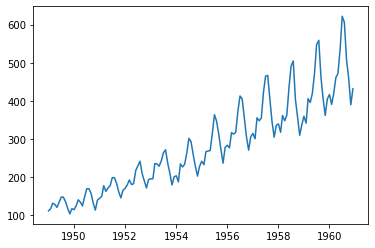

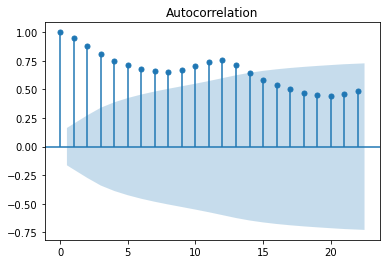

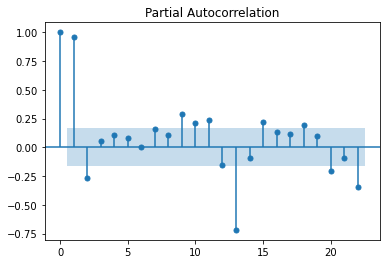

In [312]:
plot_ts(passengers['Count'])

In [313]:
passengers_b = boxcox(passengers['Count'], 0)

p-value = 0.42236677477039125


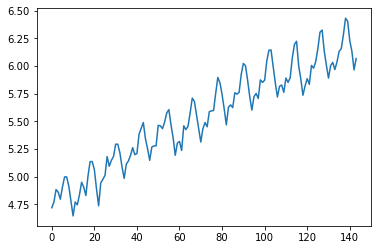

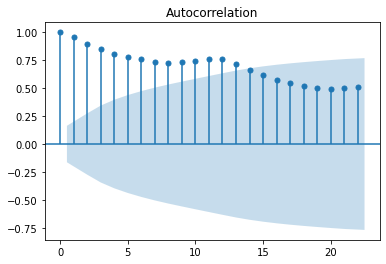

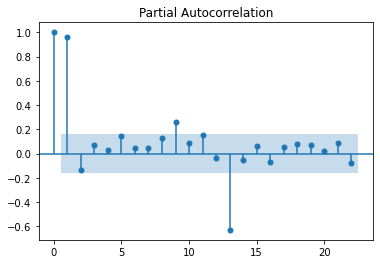

In [314]:
plot_ts(passengers_b)

In [315]:
passengers_d = diff(passengers_b, 1)

p-value = 0.07112054815085875


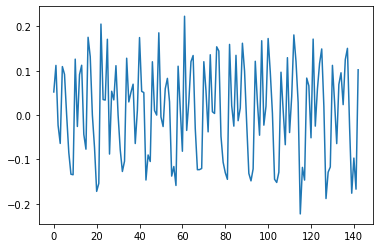

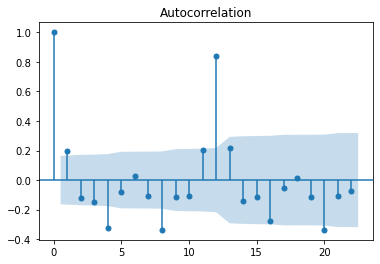

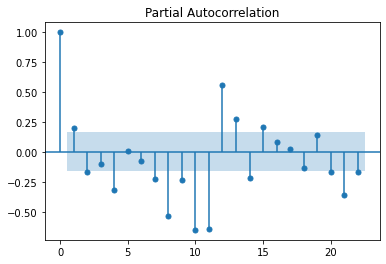

In [316]:
plot_ts(passengers_d)

In [324]:
minimisation(passengers_d, 140)

(6, 4.104886514246845e-28)

In [319]:
passengers_ds = diff(passengers_d, 6)

p-value = 4.104886514246845e-28


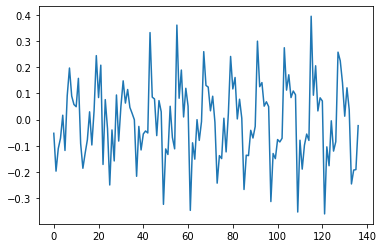

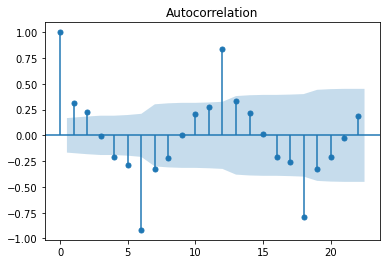

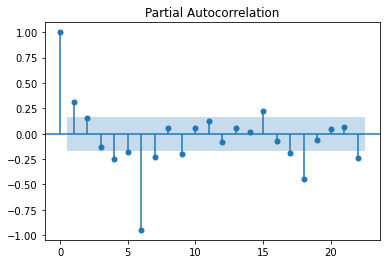

In [321]:
plot_ts(passengers_ds)

In [326]:
minimisation(passengers_ds, 100)

(34, 0.0)

In [327]:
passengers_dss = diff(passengers_ds, 34)

p-value = 0.0


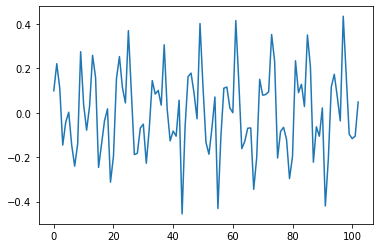

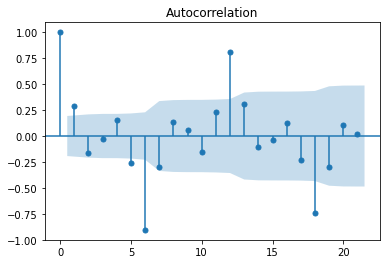

C:\Users\35846\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


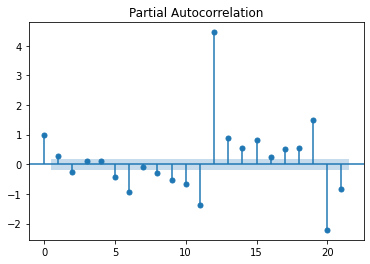

In [328]:
plot_ts(passengers_dss)

Ряд стационарен

### temp

p-value = 0.016989030222608687


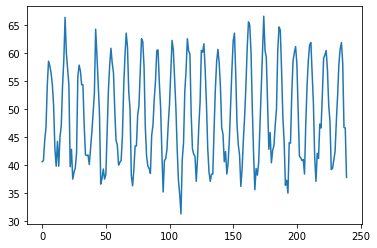

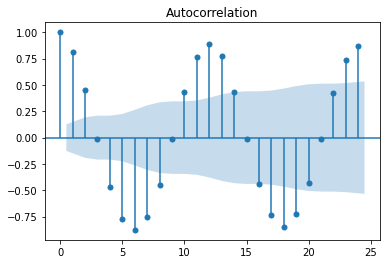

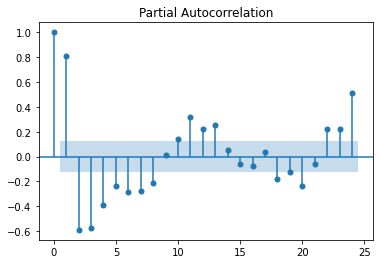

In [347]:
temp_a = temp['Deg'].to_numpy()
plot_ts(temp_a)

p_value 0,016. Но на кореллограмме видна сезонность

In [357]:
temp_b = boxcox(temp_a, 0)

p-value = 0.0033325562525332803


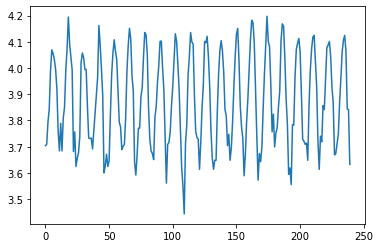

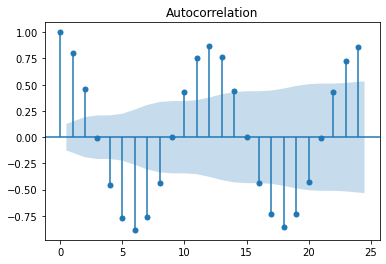

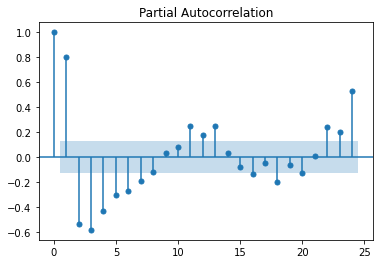

In [358]:
plot_ts(temp_b)

In [359]:
temp_ds = diff(temp_b, 12)

p-value = 1.8835990821806007e-08


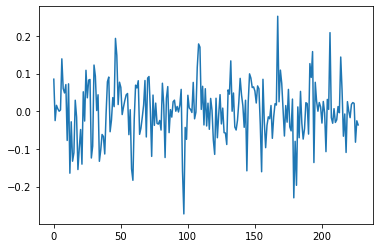

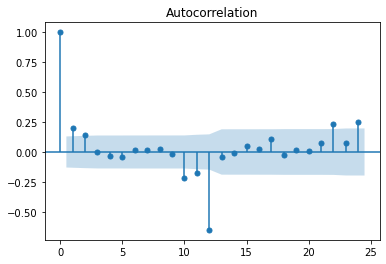

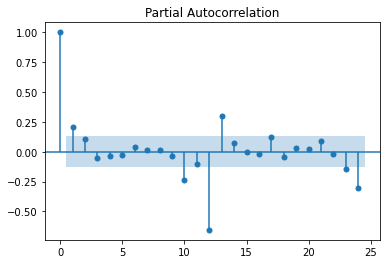

In [360]:
plot_ts(temp_ds)

Ряд стационарен

### dowjones

In [355]:
dowjones_a = dowjones['Close'].to_numpy()

p-value = 0.6224548515589717


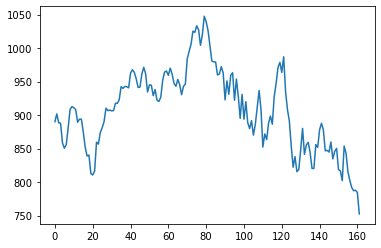

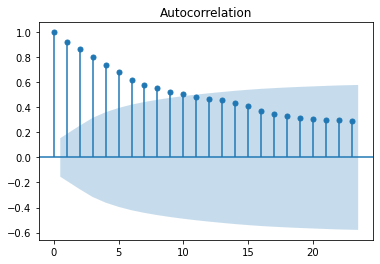

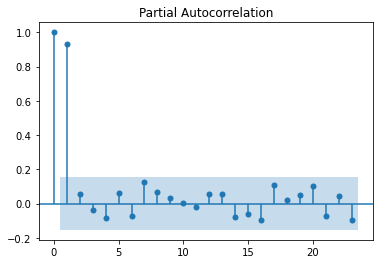

In [356]:
plot_ts(dowjones_a)

In [361]:
dowjones_b = boxcox(dowjones_a, 0)

p-value = 0.669119482757722


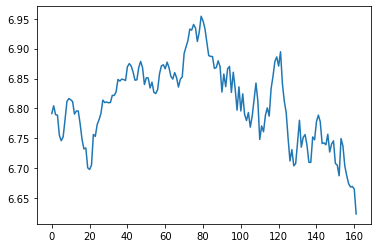

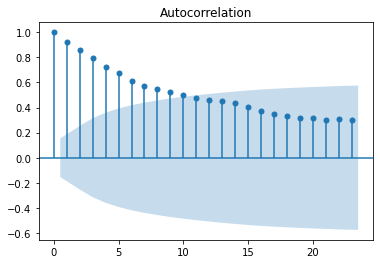

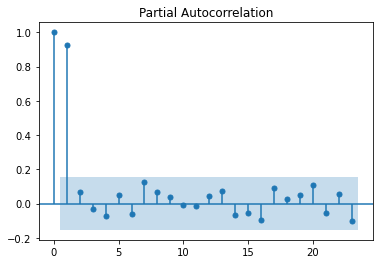

In [362]:
plot_ts(dowjones_b)

In [364]:
dowjones_d = diff(dowjones_b, 1)

p-value = 2.751609132291384e-24


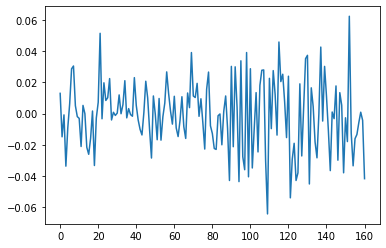

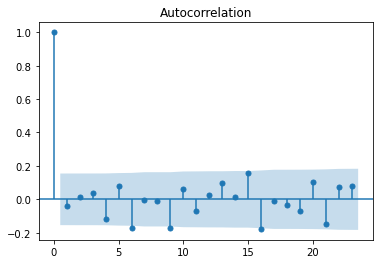

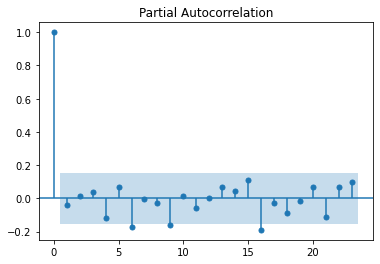

In [365]:
plot_ts(dowjones_d)

Ряд стационарен

### births

In [367]:
births_a = births['Count'].to_numpy()

p-value = 5.243412990149865e-05


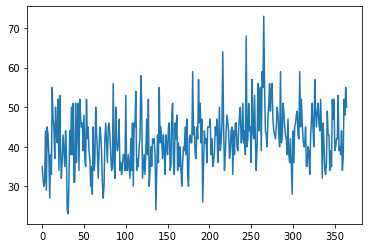

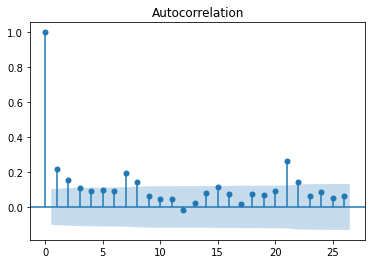

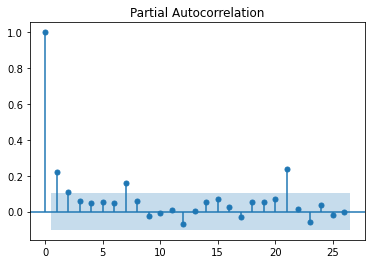

In [368]:
plot_ts(births_a)

In [372]:
births_b = boxcox(births_a, 0)

p-value = 0.0003588965449025611


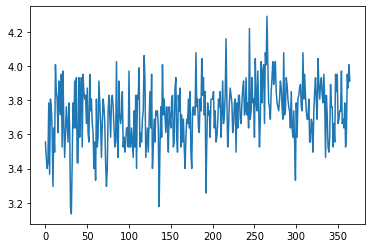

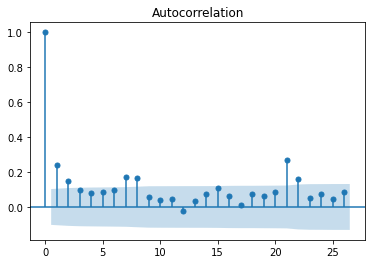

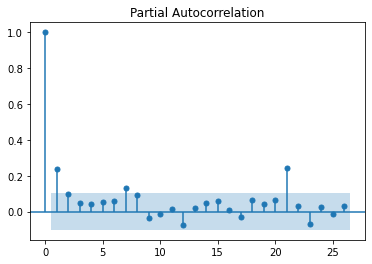

In [373]:
plot_ts(births_b)

Удаление дисперсии только увеличило значение p_value с 0,00005 до 0,0003. Но ряд в любом случае стационарен